<a href="https://colab.research.google.com/github/curiosity806/2020_dacon_satellite_precipitation/blob/rotation-flip%2Fbaseline/augmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
import numpy as np
import matplotlib.pyplot as plt

In [0]:
import os.path

if not os.path.isfile('train.npy'):
    !cp '/content/drive/My Drive/2020 Kaggle Study/data/train.npy' train.npy

train = np.load('train.npy')  # float32

In [0]:
def r(a, n=1):
    return np.rot90(a, n, (1, 2))

def f_ud(a):
    return np.flip(a, 1)

def f_lr(a):
    return np.flip(a, 2)

def t(a):
    return np.transpose(a, (0, 2, 1, 3))

In [0]:
abcd = train
acbd = r(f_lr(train))
badc = f_lr(train)
bdac = r(train)
cadb = r(train, 3)
cdab = f_ud(train)
dbca = t(r(train, 2))
dcba = r(train, 2)

In [0]:
file_path = '/content/drive/My Drive/2020 Kaggle Study/data/rotation_flip/train{}.npy'

abcd.save(file_path.format(0))
acbd.save(file_path.format(1))
badc.save(file_path.format(2))
bdac.save(file_path.format(3))
cadb.save(file_path.format(4))
cdab.save(file_path.format(5))
dbca.save(file_path.format(6))
dcba.save(file_path.format(7))

In [0]:
abcd_acbd = np.concatenate((abcd, acbd), 0)

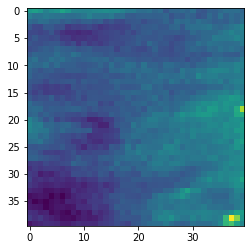

In [0]:
a = train[0, :, :, 5]
plt.imshow(a)
plt.show()

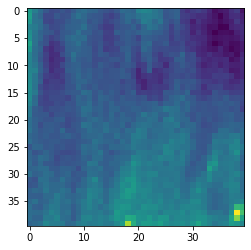

In [0]:
a = np.transpose(train, (0, 2, 1, 3))[0, :, :, 5]  # transpose
plt.imshow(a)
plt.show()

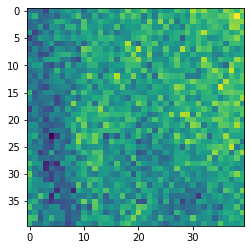

In [0]:
plt.imshow(np.rot90(train, 1, (1, 2))[0, :, :, 0])  # 왼쪽 90도
plt.show()

In [0]:
np.flip(train, 2)[0, :, :, 0]  # left-right flip

array([[173.28308, 173.87192, 173.03848, ..., 173.59732, 174.91165,
        174.67711],
       [173.17508, 174.55893, 173.30397, ..., 174.28555, 174.80511,
        173.48848],
       [173.22388, 173.15103, 173.05702, ..., 173.06757, 172.76883,
        173.3006 ],
       ...,
       [175.14757, 175.50208, 175.40817, ..., 174.41496, 174.67131,
        174.22482],
       [174.75473, 176.35051, 175.38191, ..., 174.10208, 174.43561,
        174.01556],
       [175.48964, 174.91643, 175.51073, ..., 175.17825, 174.10754,
        174.40747]], dtype=float32)

In [0]:
np.flip(train, 1)[0, :, :, 0]  # up-down flip

array([[174.40747, 174.10754, 175.17825, ..., 175.51073, 174.91643,
        175.48964],
       [174.01556, 174.43561, 174.10208, ..., 175.38191, 176.35051,
        174.75473],
       [174.22482, 174.67131, 174.41496, ..., 175.40817, 175.50208,
        175.14757],
       ...,
       [173.3006 , 172.76883, 173.06757, ..., 173.05702, 173.15103,
        173.22388],
       [173.48848, 174.80511, 174.28555, ..., 173.30397, 174.55893,
        173.17508],
       [174.67711, 174.91165, 173.59732, ..., 173.03848, 173.87192,
        173.28308]], dtype=float32)

In [0]:
a = np.array([[1, 2], [3, 4]])
a

array([[1, 2],
       [3, 4]])

In [0]:
f_lr(a)

array([[2, 1],
       [4, 3]])

In [0]:
def r(a):
    return np.rot90(a, 1, (0, 1))

def f_lr(a):
    return np.fliplr(a)

def f_up(a):
    return np.flipud(a)

def t(a):
    return a.transpose()

def u(a):
    return r(f_lr(a))

In [0]:
cnt = 0
arr = {}

for i in range(3):
    b = a

    for ii in range(i):
        b = r(b)

    for j in range(2):
        for jj in range(j):
            b = f_lr(b)

        for k in range(2):
            for kk in range(k):
                b = f_up(a)

            for l in range(2):
                for ll in range(l):
                    b = t(b)

                for m in range(2):
                    for mm in range(m):
                        b = u(b)

                    # print(i, j, k, l, m)
                    # print(b)
                    arr[i, j, k, l, m] = b
                    cnt += 1

cnt
# np.array_equal(a, b)

48

In [0]:
arr2 = {}

for i, j, k, l, m in arr:
    check = False
    for ii, jj, kk, ll, mm in arr2:
        if np.array_equal(arr[i, j, k, l, m], arr2[ii, jj, kk, ll, mm]):
            check = True
    if not check:
        arr2[i, j, k, l, m] = arr[i, j, k, l, m]
        print(i, j, k, l, m)
        print(arr[i, j, k, l, m])

0 0 0 0 0
[[1 2]
 [3 4]]
0 0 0 0 1
[[1 3]
 [2 4]]
0 0 1 0 0
[[3 4]
 [1 2]]
0 0 1 0 1
[[3 1]
 [4 2]]
1 0 0 0 0
[[2 4]
 [1 3]]
1 0 0 0 1
[[2 1]
 [4 3]]
2 0 0 0 0
[[4 3]
 [2 1]]
2 0 0 0 1
[[4 2]
 [3 1]]
